# 1. Introduction to Deep Learning

Deep learning is a subfield of machine learning that involves the creation and training of neural networks with multiple layers. Deep learning models are capable of automatically learning hierarchical representations of data, allowing them to perform complex tasks such as image and speech recognition, natural language processing, and autonomous driving. The networks consist of layers of nodes, or neurons, that process and transform input data to generate output predictions. The term "deep" refers to the fact that the networks can have many layers, which enables them to learn complex patterns and relationships in the data.

While neural networks can have multiple layers, they are not necessarily deep. Deep learning, on the other hand, refers specifically to neural networks with multiple hidden layers that are used to model complex relationships between inputs and outputs.

Neural networks are composed of various elements and functions that work together to make predictions and learn from data. Here are some of the key elements and functions:
    **Input layer**: This layer receives the input data, such as images, audio, or text.
    **Hidden layers**: These layers are in between the input and output layers, and they process the input data using weights and biases to produce output values.
    **Output layer**: This layer produces the final output of the network, such as a predicted label or a probability distribution over classes.
    **Neurons**: These are the basic units of a neural network that perform computations using inputs, weights, and biases. They are also known as nodes or units.
    **Activation function**: This function is applied to the output of each neuron to introduce non-linearity into the network and allow it to model complex relationships between inputs and outputs. Common activation functions include ReLU, sigmoid, and tanh.
    **Weight**: This is a parameter of a neuron that determines the strength of the connection between the neuron's inputs and its output. It is adjusted during training to improve the accuracy of the network's predictions.
    **Bias**: This is an additional parameter of a neuron that determines the neuron's output when all its inputs are zero. It is also adjusted during training.
    **Loss function**: This function measures the difference between the predicted output of the network and the true output, and it is used to train the network by adjusting the weights and biases to minimize the loss.
    **Optimization algorithm**: This algorithm is used to update the weights and biases during training to minimize the loss. Common optimization algorithms include stochastic gradient descent (SGD) and its variants, such as Adam and RMSprop.
   
By combining these elements and functions, neural networks can learn complex patterns and relationships in data and make accurate predictions on new data.

## Forward propagation algorithm

Forward propagation is the process of computing the output of a neural network given an input. It involves passing the input through the network layer by layer, with each layer transforming the input in some way, until the output is produced.

![example_1](img/example_1.png)


In [607]:
import numpy as np

In [608]:
input_data = np.array([2, 3])
weights = {'node_0': np.array([1, 1]),'node_1': np.array([-1, 1]),'output': np.array([2, -1])}

In [609]:
# Calculate node 0 value: node_0_value
node_0_value = (weights['node_0'] * input_data).sum()

# Calculate node 1 value: node_1_value
node_1_value = (weights['node_1'] * input_data).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (weights['output'] * hidden_layer_outputs).sum()

# Print output
print(output)

9


## The Rectified Linear Activation Function

Activation functions are used in neural networks to introduce nonlinearity into the output of a neuron. Without an activation function, a neural network would simply be a linear regression model, and would be limited in its ability to learn complex patterns in the data.

The Rectified Linear Activation Function (ReLU) is an activation function, a piecewise linear function that returns the input if it is positive, and zero otherwise. In other words, ReLU is defined as: f(x) = max(0, x), where x is the input to the activation function, and f(x) is the output.

In [610]:
def relu(input):
    
    """
    Computes the rectified linear unit (ReLU) activation function.

    Parameters
    ----------
    input : float
        The input value to the ReLU function.

    Returns
    -------
    float
        The output value of the ReLU function, which is the maximum of the input
        value and 0.

    Notes
    -----
    The ReLU activation function is commonly used in neural networks to introduce
    nonlinearity in the network. It returns the input value if it is positive,
    and 0 otherwise.
    """
    
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [611]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


## Applying the network to many observations/rows of data

In [612]:
# Define predict_with_network()
def predict_with_network_h1(input_data_row, weights):
    
    """
    Predicts the output of a neural network with a single hidden layer using the given input data row and weights.

    Parameters
    ----------
    input_data_row : numpy.ndarray
        An array containing the input data row of the neural network.
    weights : dict
        A dictionary containing the weights of the neural network, with keys 'node_0' and 'node_1' for the weights      of the hidden layer nodes, and key 'output' for the weights of the output layer.

    Returns
    -------
    float
        The predicted output of the neural network.

    Notes
    -----
    The neural network model has one hidden layer with two nodes, and an output
    layer with a single node. The rectified linear unit (ReLU) activation
    function is applied to the output of each node in the network.
    """

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [613]:
input_data = np.array([[3,5],[1,-1],[0,0],[8,4]])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network_h1(input_data_row, weights))

# Print results
print(results)    

[52, 63, 0, 148]


## Multi-layer neural networks

Multi-layer neural networks contain more than one layer of neurons between the input and output layers. These layers are called hidden layers, as their output is not directly observed.

The hidden layers of a multi-layer neural network allow it to learn more complex representations of the input data, and thus to model more complex functions. Each hidden layer applies a non-linear transformation to the input data, and passes the result to the next layer. The output layer produces the final output of the network, which can be a classification, regression, or other kind of prediction.

![example_2](img/example_2.png)


In [614]:
def predict_with_network_h2(input_data, weights):
    
    """
    Computes the output of a neural network with two hidden layers and ReLU activation function.

    Parameters
    ----------
    input_data_row : numpy.ndarray
        An array containing the input data row of the neural network.
    weights : dict
        A dictionary containing the weights of the neural network.

    Returns
    -------
    float
        The predicted output of the neural network model.

    Notes
    -----
    The neural network model has two hidden layers, each containing two nodes.
    The output of the first layer is passed as input to the second layer, and
    the output of the second layer is used to calculate the final output of the
    network. The rectified linear unit (ReLU) activation function is applied to
    the output of each node in the network.
    """
    
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

In [615]:
input_data = np.array([3,5])
weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

output = predict_with_network_h2(input_data, weights)
print(output)

182


## How weight changes affect accuracy?

The weights in a neural network are the parameters that determine how the input data is transformed through the layers of the network to produce the output. When training a neural network, the goal is to find the optimal values for the weights that will produce accurate predictions on new, unseen data.

If the weight changes are small and the network structure is well-suited to the problem at hand, then the changes are more likely to improve accuracy. On the other hand, if the weight changes are large or the network structure is not appropriate for the problem, then the changes may reduce accuracy or cause the network to converge to a suboptimal solution.

![example_3](img/example_3.png)


In [616]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network_h1(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network_h1(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


## Mean squared error

In neural networks, Mean Squared Error (MSE) is a commonly used loss function to measure the difference between predicted and actual values. The MSE calculates the average squared difference between the predicted output and the actual output.

### Measure model accuracy on many points

In [617]:
input_data = np.array([[0,3],[1,2],[-1,-2],[4,0]])
target_actuals = [1, 3, 5, 7]
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),'node_1': np.array([1. , 1.5]),'output': np.array([1. , 1.5])}

In [618]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_h1(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_h1(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent for weights update

Gradient descent is an optimization algorithm used to minimize the cost or error function of a machine learning model. The cost function measures the difference between the predicted output and the actual output. The goal of gradient descent is to find the set of model parameters that minimize the cost function.

In gradient descent, the model parameters are updated iteratively by subtracting a fraction of the gradient vector from the current parameter values. This fraction is known as the learning rate, and it determines the step size of the algorithm.

The gradient descent algorithm moves in the direction of the negative gradient because the negative gradient points in the direction of steepest descent of the cost function. The magnitude of the gradient vector represents the slope of the cost function at a given point, and the direction of the gradient vector indicates the direction of the steepest slope.


In gradient descent, the weights or model parameters are updated iteratively based on the gradient of the cost function with respect to the weights. The update equation is as follows:

θ = θ - α∇J(θ)

where θ represents the vector of weights, α is the learning rate (a hyperparameter that determines the step size of the algorithm), J(θ) is the cost function, and ∇J(θ) is the gradient of the cost function with respect to the weights.

### Example on how to imporve model weights using the gradient descent

In [619]:
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target = 0

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(slope*learning_rate)

# Get updated predictions: preds_updated
preds_updated = (weights_updated*input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated-target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

# Print the weights updated
print(weights_updated)

7
5.04
[-0.14  1.72  0.58]


## Slope and MSE functions

In [620]:
def get_slope(input_data, target, weights):
    
    """
    Calculate the slope of the mean squared error with respect to the weights.

    Parameters
    ----------
    input_data : array-like
        The input data for the linear regression model.
    target : array-like
        The target values for the linear regression model.
    weights : array-like
        The weights to be used for the linear regression model.

    Returns
    -------
    slope : ndarray
        The slope of the mean squared error with respect to the weights.

    Notes
    -----
    This function assumes that `input_data`, `target`, and `weights` are all one-dimensional arrays of the same length.
    """
    
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()
    # Calculate the error: error
    error = preds - target
    # Calculate the slope: slope
    slope = 2 * input_data * error
    return slope

In [621]:
def get_mse(input_data, target, weights):
    """
    Calculate the mean squared error for a linear regression model.

    Parameters
    ----------
    input_data : array-like
        The input data for the linear regression model.
    target : array-like
        The target values for the linear regression model.
    weights : array-like
        The weights to be used for the linear regression model.

    Returns
    -------
    mse : float
        The mean squared error for the linear regression model.

    Notes
    -----
    This function assumes that `input_data`, `target`, and `weights` are all one-dimensional arrays of the same length.
    """
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the mean squared error: mse
    mse = (error ** 2).mean()

    return mse

### Example of making multiple updates to weights

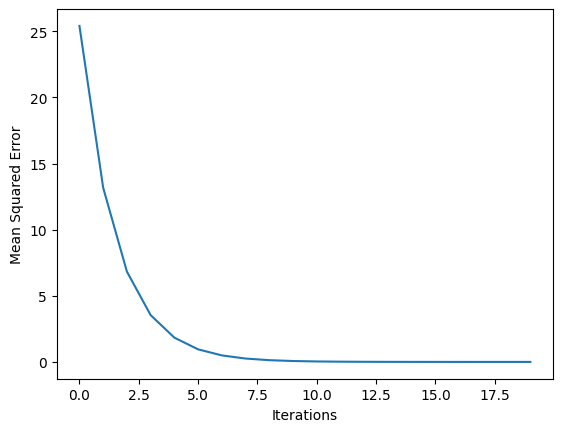

In [622]:
n_updates = 20
mse_hist = []
learning_rate = 0.01

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
import matplotlib.pyplot as plt
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation

![backpropagation](img/backpropagation.png)


Backpropagation is a process that allows neural networks to learn from data by iteratively adjusting the weights and biases of the neurons in the network. The goal of backpropagation is to minimize the difference between the network's predicted output and the actual output, which is often represented by a cost or loss function.

The algorithm involves propagating the error or loss of the network backwards from the output layer to the input layer, and adjusting the weights of the neurons in the network based on the gradient of the error with respect to the weights.

### Backpropagation process 

Here is a step-by-step overview of the backpropagation process:

Forward Propagation: The forward propagation step is the process of passing input data through the network to obtain an output prediction. During this step, each neuron in the network calculates a weighted sum of the inputs it receives, adds a bias term, and applies an activation function to produce an output value.

Calculate Error: After obtaining the output prediction, we calculate the error or loss of the network by comparing the predicted output to the actual output.

Backward Propagation: During this step, the error is propagated backwards through the network, starting from the output layer and moving towards the input layer. The gradient of the error with respect to the weights of each neuron in the network is calculated using the chain rule of calculus.

Update Weights: Once the gradient has been calculated, it is used to update the weights of each neuron in the network. This update is performed using an optimization algorithm such as stochastic gradient descent, which adjusts the weights in the direction that reduces the error.

Repeat: Steps 1-4 are repeated for each input in the training set until the network converges to a set of weights that minimizes the error.

### Example of backpropagation function

The function takes as input the training data X and labels y, the number of hidden units n_hidden, the learning rate, and the number of training iterations. It initializes the weights randomly and performs a loop over the training iterations.

In each iteration, it performs forward propagation to compute the network output y_pred, and then computes the mean squared error loss and gradients using backpropagation. It then updates the weights using the gradients and the learning rate. Finally, it prints the progress and returns the final weights W and b.



In [623]:
import numpy as np

def backpropagation_single_layer(X, y, n_hidden, learning_rate, n_iterations):
    # Initialize weights and biases
    W = np.random.randn(X.shape[1], n_hidden)
    b = np.zeros((1, n_hidden))

    # Initialize list to store MSE history
    mse_hist = []

    # Gradient descent loop
    for i in range(n_iterations):
        # Forward propagation
        z = np.dot(X, W) + b
        a = 1 / (1 + np.exp(-z))

        # Backpropagation
        dz = a - y
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Compute and store MSE
        mse = np.mean(np.square(a - y))
        mse_hist.append(mse)

    return W, b, mse_hist


Final weights:
[[-0.99559714 -0.99425513  1.26140798 -0.99064051]
 [ 0.22127703  0.22151582 -0.58767904  0.22272792]]
Final biases:
[[0.39476544 0.39331305 0.91823534 0.38976342]]


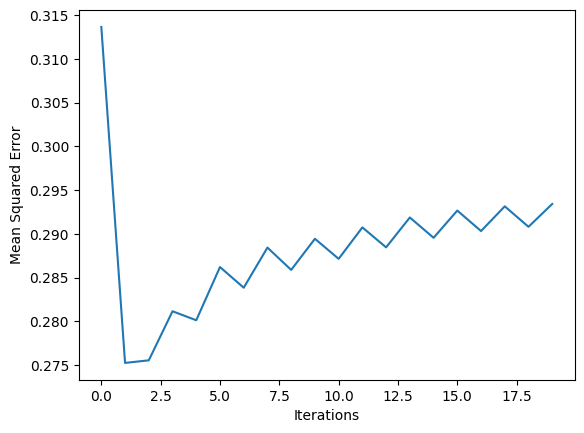

In [624]:
# Generate some sample data
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=(100, 1))

# Train a single-layer network using backpropagation
n_hidden = 4
learning_rate = 0.1
n_iterations = 20
W, b, mse_hist = backpropagation_single_layer(X, y, n_hidden, learning_rate, n_iterations)

# Print the final weights and biases
print("Final weights:")
print(W)
print("Final biases:")
print(b)

# Plot the MSE history
import matplotlib.pyplot as plt
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


# 2. Keras model

Keras Sequential is a model type in the Keras API for building neural network models in Python. It allows you to create a model by simply adding layers to it one at a time, in a linear, sequential order.

In Keras, a dense layer is a type of neural network layer that is also known as a fully connected layer. A dense layer takes in inputs from all the neurons in the previous layer and applies a set of weights to those inputs to produce a set of outputs. Each neuron in the dense layer is connected to every neuron in the previous layer. The number of neurons in the dense layer determines the number of outputs produced by that layer.

The units parameter specifies the number of neurons in the layer. The activation parameter specifies the activation function to be used in the layer. The input_shape parameter specifies the shape of the input data.

### Prepare the data

In [625]:
# Dataframe
import pandas as pd
df = pd.read_csv("datasets/hourly_wages.csv")
target = df['wage_per_hour'].to_numpy()
dfp = df.drop(['wage_per_hour'], axis=1)
predictors = dfp.to_numpy()

### Specify a model

In [626]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

### Compiling the model

To compile the model, you need to specify the optimizer and loss function to use.
The Adam optimizer is an adaptive learning rate optimization algorithm that is well-suited for stochastic gradient descent problems, particularly those with large datasets or many parameters.

In [627]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model

In [628]:
model.fit(predictors, target)

17/17 [==============================] - 0s 958us/step - loss: 205.3155


## Classification model using the titanic dataset

An example of how to use Keras to create a neural network model for binary classification, and then use the trained model to make predictions on new data.

In [629]:
# Dataframe
import pandas as pd
df = pd.read_csv("datasets/titanic_all_numeric.csv")
dfn = df.drop(['survived'], axis=1)
predictors = dfn.to_numpy().astype(np.float32)
n_cols = dfn.shape[1]

In [630]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived.astype(np.float32))

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 748us/step - loss: 2.5563 - accuracy: 0.5971


Note: 

The Rectified Linear Activation Function (ReLU) is an activation function, a piecewise linear function that returns the input if it is positive, and zero otherwise. In other words, ReLU is defined as: f(x) = max(0, x), where x is the input to the activation function, and f(x) is the output.

The softmax activation function is commonly used in the output layer of a neural network for multi-class classification problems. It takes a vector of real numbers as input and outputs another vector of the same dimension, where each element is a probability value between 0 and 1. The output vector is normalized so that its elements sum to 1, which makes it suitable for interpreting the output as a probability distribution over the classes.

In SGD, instead of computing the gradient of the loss function with respect to the weights using the entire training dataset, the gradient is computed for a single training example at a time. This makes SGD faster and more efficient, especially for large datasets.

Categorical_crossentropy is a commonly used loss function in neural networks for multi-class classification problems, where the output has a probability distribution over multiple classes. It is often used in conjunction with the softmax activation function in the output layer. The categorical cross-entropy loss function measures the dissimilarity between the true class distribution and the predicted class distribution.

### Making predictions

In [631]:
pred_data = np.array([[  2.      ,  34.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  31.      ,   1.      ,   1.      ,  26.25    ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ]])
                      
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# Print predicted_prob_true
print(predicted_prob_true)

1/1 [==============================] - 0s 28ms/step
[0.6667005  0.84500647]


Note: The predicted probabilities of survival for the new data are stored in the predicted_prob_true.

### Changing optimization parameters

Optimize a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. 

In [632]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [633]:
input_shape=(n_cols,)

# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape)
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = 'adam', loss ='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 1ms/step - loss: 1.3378


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 963us/step - loss: 0.9827


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 983us/step - loss: 0.8907


### Evaluating model accuracy on validation dataset. Optimizing the optimization.

In Keras, EarlyStopping is a callback that stops the training of a neural network model when a monitored metric has stopped improving. It helps to avoid overfitting and save time by stopping the training process early.

In [634]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3,epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 7ms/step - loss: 0.8880 - accuracy: 0.5923 - val_loss: 0.9103 - val_accuracy: 0.6418
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.6404 - val_loss: 0.6782 - val_accuracy: 0.6418
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.6244 - val_loss: 0.6983 - val_accuracy: 0.6418
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6742 - val_loss: 0.8909 - val_accuracy: 0.4627


### Experimenting with wider networks

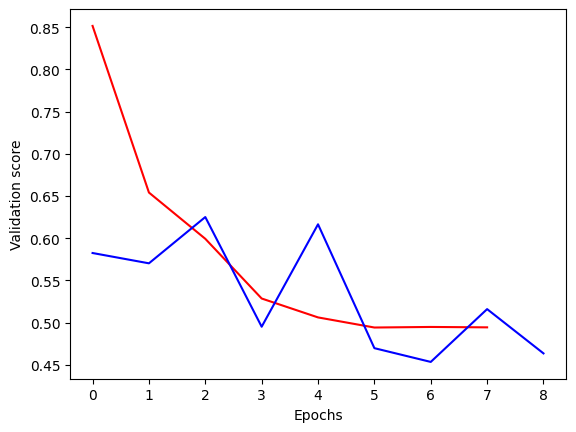

In [635]:
from keras.models import Sequential
from keras.layers import Dense

# Define a narrow model
narrow_model = Sequential()
narrow_model.add(Dense(10, activation='relu', input_shape=input_shape))
narrow_model.add(Dense(10, activation='relu'))
narrow_model.add(Dense(2, activation='softmax'))
narrow_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the narrow model
model_n_training = narrow_model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Define a wider model
wider_model = Sequential()
wider_model.add(Dense(100, activation='relu', input_shape=input_shape))
wider_model.add(Dense(100, activation='relu'))
wider_model.add(Dense(2, activation='softmax'))
wider_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the wider model
model_w_training = wider_model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_n_training.history['val_loss'], 'r', model_w_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Note: Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

### Experimenting with layers

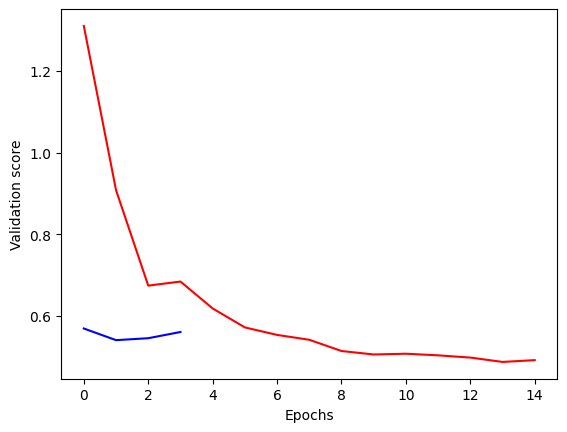

In [636]:
from keras.models import Sequential
from keras.layers import Dense

# Define a narrow model
narrow_model = Sequential()
narrow_model.add(Dense(10, activation='relu', input_shape=input_shape))
narrow_model.add(Dense(2, activation='softmax'))
narrow_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the narrow model
model_n_training = narrow_model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Define a wider model
wider_model = Sequential()
wider_model.add(Dense(10, activation='relu', input_shape=input_shape))
wider_model.add(Dense(10, activation='relu'))
wider_model.add(Dense(10, activation='relu'))
wider_model.add(Dense(2, activation='softmax'))
wider_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the wider model
model_w_training = wider_model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_n_training.history['val_loss'], 'r', model_w_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Model capacity

Model capacity refers to the ability of a model to learn complex relationships between input and output data.
Sequential experiments involve progressively increasing the capacity of a model by adding layers or increasing the number of nodes in existing layers, in order to achieve better performance on a given task.

Here are some tips for conducting sequential experiments to optimize model capacity using Keras:

Start with a simple model: Begin with a simple model architecture that can solve the problem to some extent. This will serve as a baseline and help you evaluate whether adding complexity to the model improves performance.

Use appropriate loss function and optimizer: Choose a suitable loss function and optimizer based on the problem you are solving. For instance, for binary classification problems, binary cross-entropy loss and Adam optimizer can be a good starting point.

Adjust the number of neurons and layers: Experiment with different numbers of neurons and layers to find the optimal architecture for your problem. Use small increments in the number of neurons or layers and observe the effect on model performance.

Change activation functions: Try different activation functions such as ReLU, sigmoid, or tanh. The choice of activation function can have a significant impact on model performance.

Regularize the model: Use regularization techniques such as L1, L2, or dropout to prevent overfitting. Overfitting can occur when the model becomes too complex and starts fitting the noise in the training data.

Use early stopping: Monitor the model's performance on the validation set and use early stopping to prevent the model from overfitting. Early stopping can be achieved by monitoring the validation loss and stopping training when the loss stops improving.

Experiment with batch size and learning rate: Try different batch sizes and learning rates to find the optimal values. A small batch size can lead to faster convergence but can be computationally expensive. A large learning rate can result in overshooting the optimal solution, while a small learning rate can take longer to converge.

Evaluate the model on a test set: Once you have found the optimal model architecture, evaluate it on a test set to get a final estimate of model performance. This will give you an idea of how well the model generalizes to unseen data.

Remember that optimizing model capacity is an iterative process that requires experimentation and tuning. Keep a record of your experiments and their results, and use them to guide your decisions in future experiments.

## Application: Building a digit recognition model

In [637]:
from mlxtend.data import mnist_data
X, y = mnist_data()

In [638]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded representation
y = to_categorical(y, num_classes=10)

In [639]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(500, activation='relu', input_shape=(X.shape[1],)))

# Add the second hidden layer
model.add(Dense(500, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 6ms/step - loss: 8.9874 - accuracy: 0.8600 - val_loss: 191.1556 - val_accuracy: 0.0000e+00
Epoch 2/10
110/110 [==============================] - 1s 5ms/step - loss: 1.5944 - accuracy: 0.9494 - val_loss: 134.0440 - val_accuracy: 0.0000e+00
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 0.5326 - accuracy: 0.9749 - val_loss: 138.9676 - val_accuracy: 0.0000e+00
Epoch 4/10
110/110 [==============================] - 1s 5ms/step - loss: 0.5334 - accuracy: 0.9769 - val_loss: 149.1591 - val_accuracy: 0.0000e+00
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 0.4688 - accuracy: 0.9777 - val_loss: 154.5957 - val_accuracy: 0.0000e+00
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 0.6830 - accuracy: 0.9729 - val_loss: 128.1827 - val_accuracy: 0.0000e+00
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 0.2799 - accuracy: 0.9854 - val_loss: 